# Analysis of Predictors for Housing Prices
### Lynn Anderson

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import scipy.stats as stats

## Data Preparation

In [29]:
# load and investigate data
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [31]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [32]:
# check for null values
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

Heat source and Sewer system contain null values. Because the null values represent less than 0.1% of the data set, I am going to drop them. 

In [33]:
df.dropna(inplace=True)

In [34]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [58]:
# Examine the towns. This may be interesting to look at later
addresses = df['address'].str.split()
for str in addresses[:10]:
    print(str[-5])

Renton,
Seattle,
Seattle,
Seattle,
Issaquah,
Shoreline,
Burien,
Kent,
Way,
Duvall,


## Exploratory Data Analysis 
Find variables most correlated with price, and check for variables highly correlated with each other.

In [38]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
id,1.000000,-0.034096,-0.007065,-0.012382,-0.028234,-0.119276,0.031941,-0.023340,-0.015077,-0.008044,-0.041644,0.023076,-0.028858,-0.000764,0.000638
price,-0.034096,1.000000,0.288954,0.480337,0.608616,0.086550,0.180589,0.538631,0.245005,0.263674,0.313789,0.095796,0.085023,0.063430,-0.022278
bedrooms,-0.007065,0.288954,1.000000,0.588035,0.637048,0.006215,0.146871,0.546221,0.237957,0.318110,0.183660,0.145497,0.015369,0.108883,-0.106791
bathrooms,-0.012382,0.480337,0.588035,1.000000,0.772226,0.038028,0.404291,0.674239,0.260684,0.456264,0.327982,0.443379,0.041574,-0.005481,0.017684
sqft_living,-0.028234,0.608616,0.637048,0.772226,1.000000,0.122271,0.303911,0.883733,0.338387,0.510967,0.396530,0.291242,0.039089,0.102205,-0.087625
sqft_lot,-0.119276,0.086550,0.006215,0.038028,0.122271,1.000000,-0.031555,0.131756,0.004457,0.089318,0.154575,0.001897,0.009390,0.030041,-0.034408
floors,0.031941,0.180589,0.146871,0.404291,0.303911,-0.031555,1.000000,0.448245,-0.248466,0.132363,0.125016,0.544314,-0.025041,-0.218174,0.233589
sqft_above,-0.023340,0.538631,0.546221,0.674239,0.883733,0.131756,0.448245,1.000000,-0.067306,0.559972,0.312593,0.387253,0.011036,0.092317,-0.082722
sqft_basement,-0.015077,0.245005,0.237957,0.260684,0.338387,0.004457,-0.248466,-0.067306,1.000000,0.025766,0.210305,-0.230783,0.054032,0.059664,-0.045104
sqft_garage,-0.008044,0.263674,0.318110,0.456264,0.510967,0.089318,0.132363,0.559972,0.025766,1.000000,0.216512,0.447720,-0.098301,0.092092,-0.096639


In [39]:
# find variables highly correlated with price
df.corr()['price']

id              -0.034096
price            1.000000
bedrooms         0.288954
bathrooms        0.480337
sqft_living      0.608616
sqft_lot         0.086550
floors           0.180589
sqft_above       0.538631
sqft_basement    0.245005
sqft_garage      0.263674
sqft_patio       0.313789
yr_built         0.095796
yr_renovated     0.085023
lat              0.063430
long            -0.022278
Name: price, dtype: float64

Squarefoot of living room had the highest correlation with price, followed by Squarefoot above ground. Number of bathrooms had the third highest correlation.                   

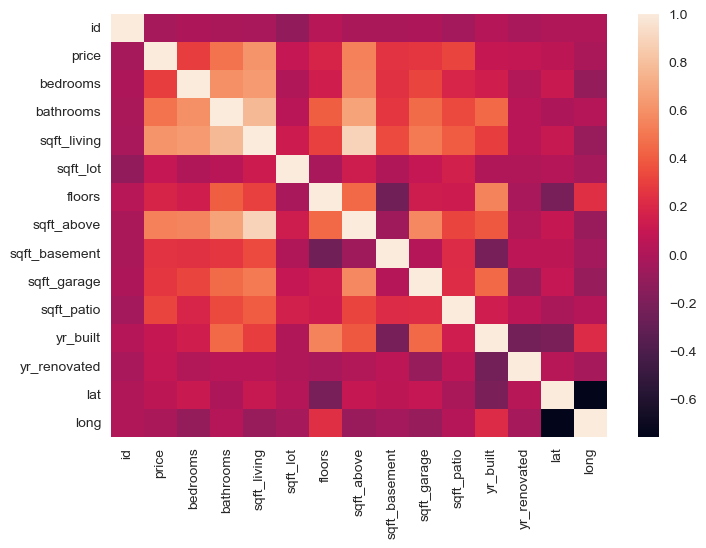

In [40]:
# heatmap of correlations
sns.heatmap(df.corr());

## Check for multicollinearity

In [41]:
# Find pairs of highly correlated independendent variables

corr_df = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))


corr_df.set_index(['pairs'], inplace = True)

#d rop level columns
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
corr_df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.

#df.drop_duplicates(inplace=True)

perfect_corrs = corr_df.cc == 1
corr_df[(corr_df.cc>.75) & (corr_df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.883733
"(sqft_living, sqft_above)",0.883733
"(bathrooms, sqft_living)",0.772226
"(sqft_living, bathrooms)",0.772226
"(lat, long)",0.760532
"(long, lat)",0.760532


In [42]:
# verify no variables are perfectly correlated with a different variable
perfect_corrs[(perfect_corrs.values == True)]

pairs
(id, id)                          True
(price, price)                    True
(lat, lat)                        True
(yr_renovated, yr_renovated)      True
(yr_built, yr_built)              True
(sqft_patio, sqft_patio)          True
(sqft_garage, sqft_garage)        True
(sqft_basement, sqft_basement)    True
(floors, floors)                  True
(sqft_lot, sqft_lot)              True
(sqft_living, sqft_living)        True
(bathrooms, bathrooms)            True
(bedrooms, bedrooms)              True
(sqft_above, sqft_above)          True
(long, long)                      True
Name: cc, dtype: bool

Squarefoot of living room and Squarefoot above ground, not surprisingly, have a high correlation. Squarefoot of living room and number of bathrooms are also highly correlated. Because I am including Squarefoot of living room in my baseline model, I will not include Squarefoot above ground or number of bathrooms in the same module.

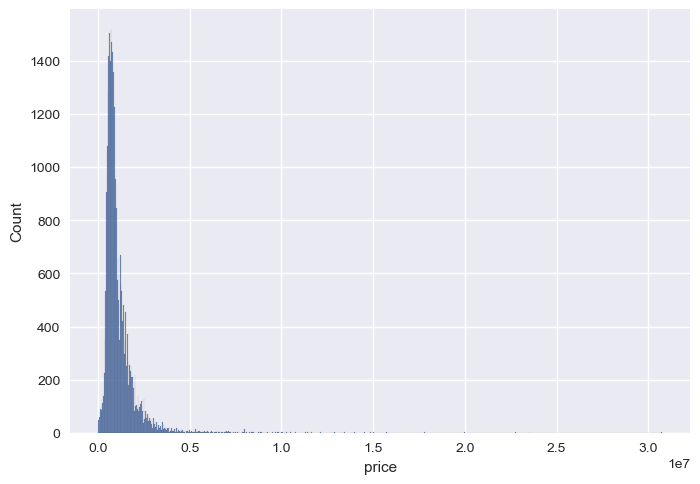

In [43]:
# distribution of price
sns.histplot(df['price'], bins='auto');

The distribution of price appears to have a positive skew and a high level of kurtosis, indicating many outliers. 

In [44]:
#plt.figure(figsize=(100, 100))
#sns.pairplot(df);

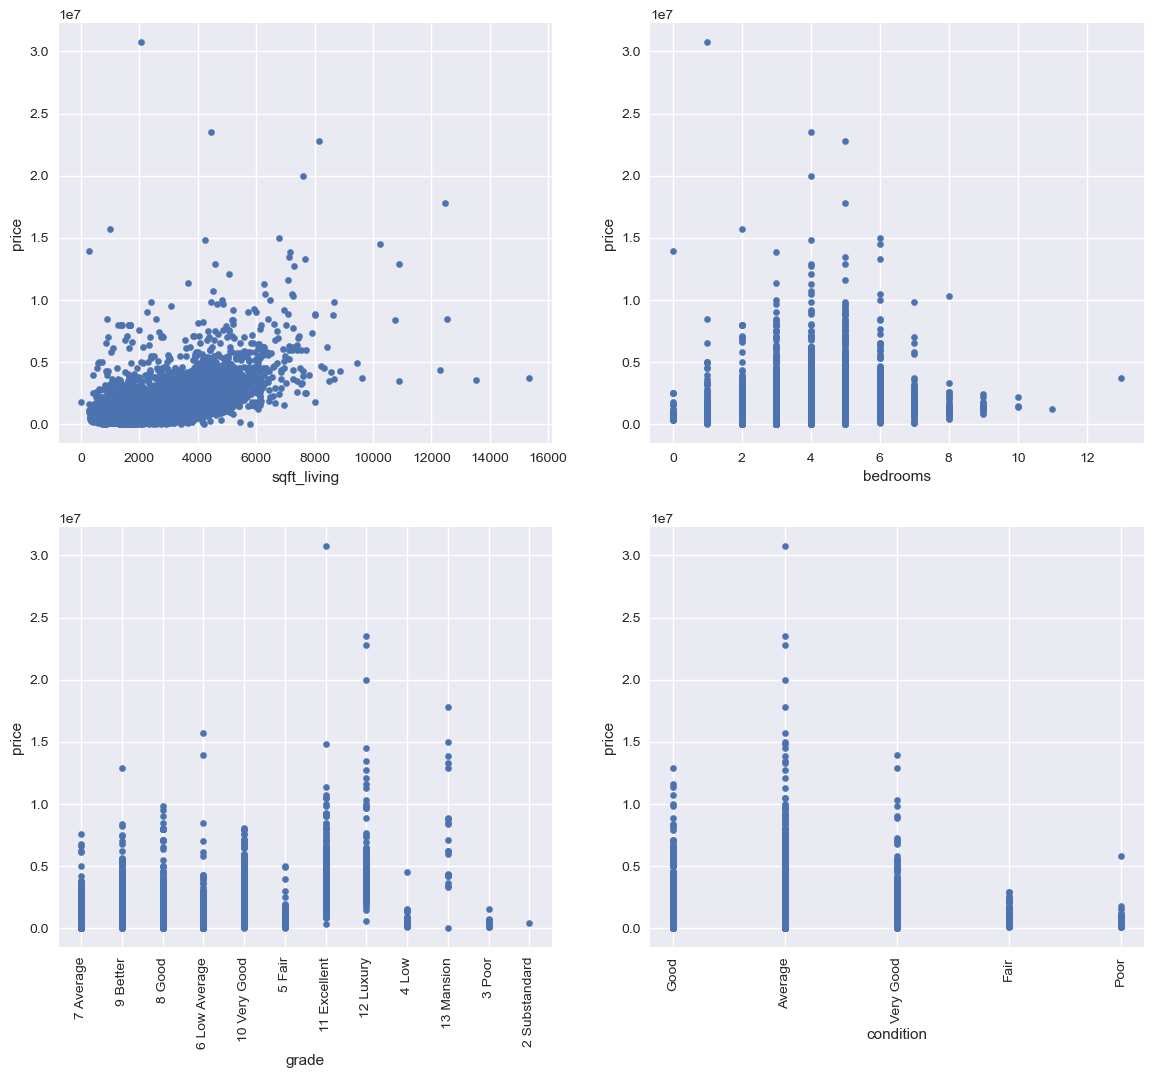

In [45]:
# scatter plot of variables which may have a high correlation

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,12))
df.plot.scatter(x="sqft_living", y="price", ax=axes[0][0])
df.plot.scatter(x="bedrooms", y="price", ax=axes[0][1])
df.plot.scatter(x="grade", y="price", ax=axes[1][0], rot=90)
df.plot.scatter(x="condition", y="price", ax=axes[1][1], rot=90);


None of the relationships appear obviously linear. It is not difficult to make out a relationship between squarefoot lving room and price. 

## Simple linear regression model with Living room squarefoot as predictor

In [46]:
y = df["price"]
X_baseline = df[["sqft_living"]]

In [47]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        13:12:14   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      

## Interpretation:

 37% of the variation in sale price is explained by the model. Both the coeficient for living room square foot and the constant are significant. Each additional square foot of living room space adds $560 to the price.The model is statistically significant overall, with an F-statistic p-value well below 0.05



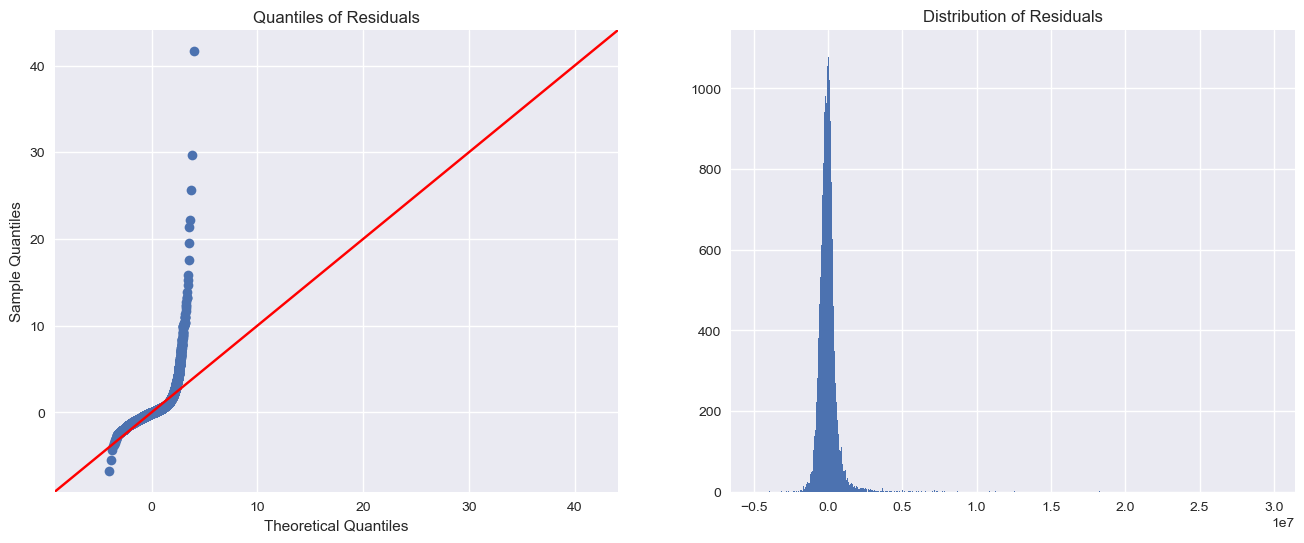

In [48]:
# plot residuals
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sm.graphics.qqplot(baseline_results.resid, dist=stats.norm, line='45', fit=True, ax=ax1)
ax2.hist(baseline_results.resid, bins="auto");
ax2.set_title("Distribution of Residuals");
ax1.set_title("Quantiles of Residuals");

The residuals do not follow a normal distribution. This violates an assumption of linnear regression. I will make transformations to the variables to find out if a better model can be produced. 

In [60]:
baseline_mae = baseline_results.resid.abs().sum() / len(y)
baseline_mae

396271.44573723007

With a MAE of $396,271 this means that on average, the model could be off by that amount in either direction. Ideally, I would like the model to be more accurate.

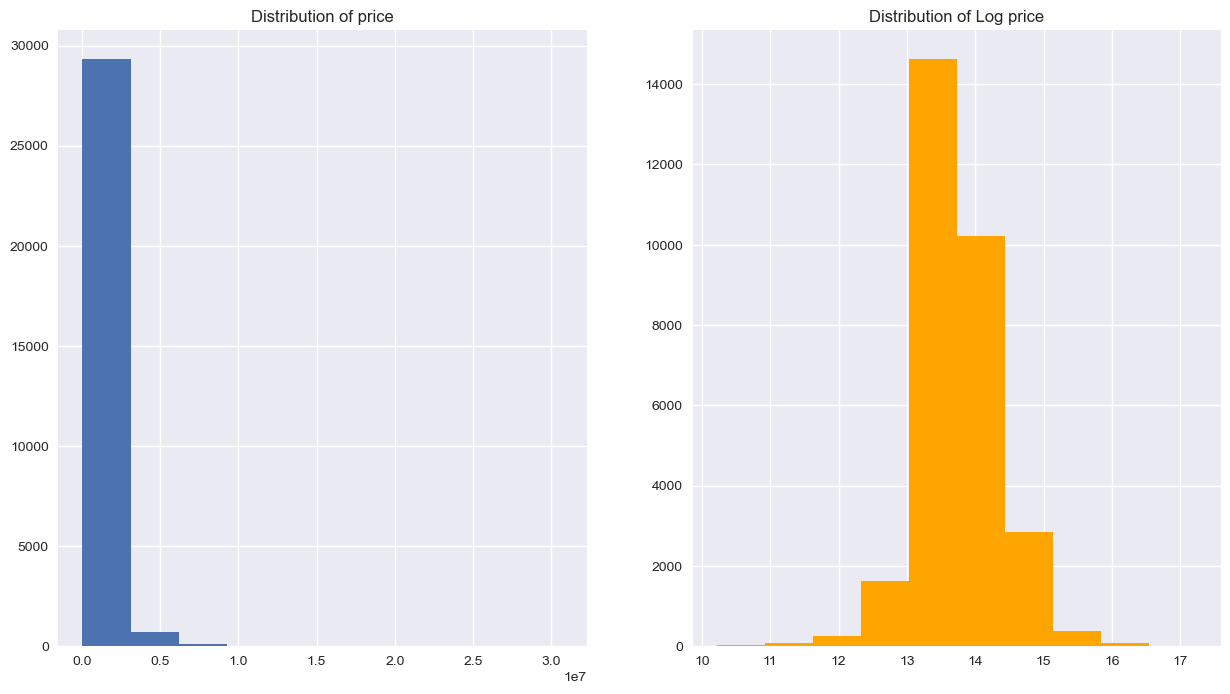

In [65]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,8))
ax1.hist(df['price'], label="price")
ax2.hist(np.log(df['price']), color="orange", label="log(price)")
#ax.legend();
ax1.set_title("Distribution of price");
ax2.set_title("Distribution of Log price");

In [66]:
df['log_price'] = np.log(df['price'])

In [67]:
y_log = df['log_price']

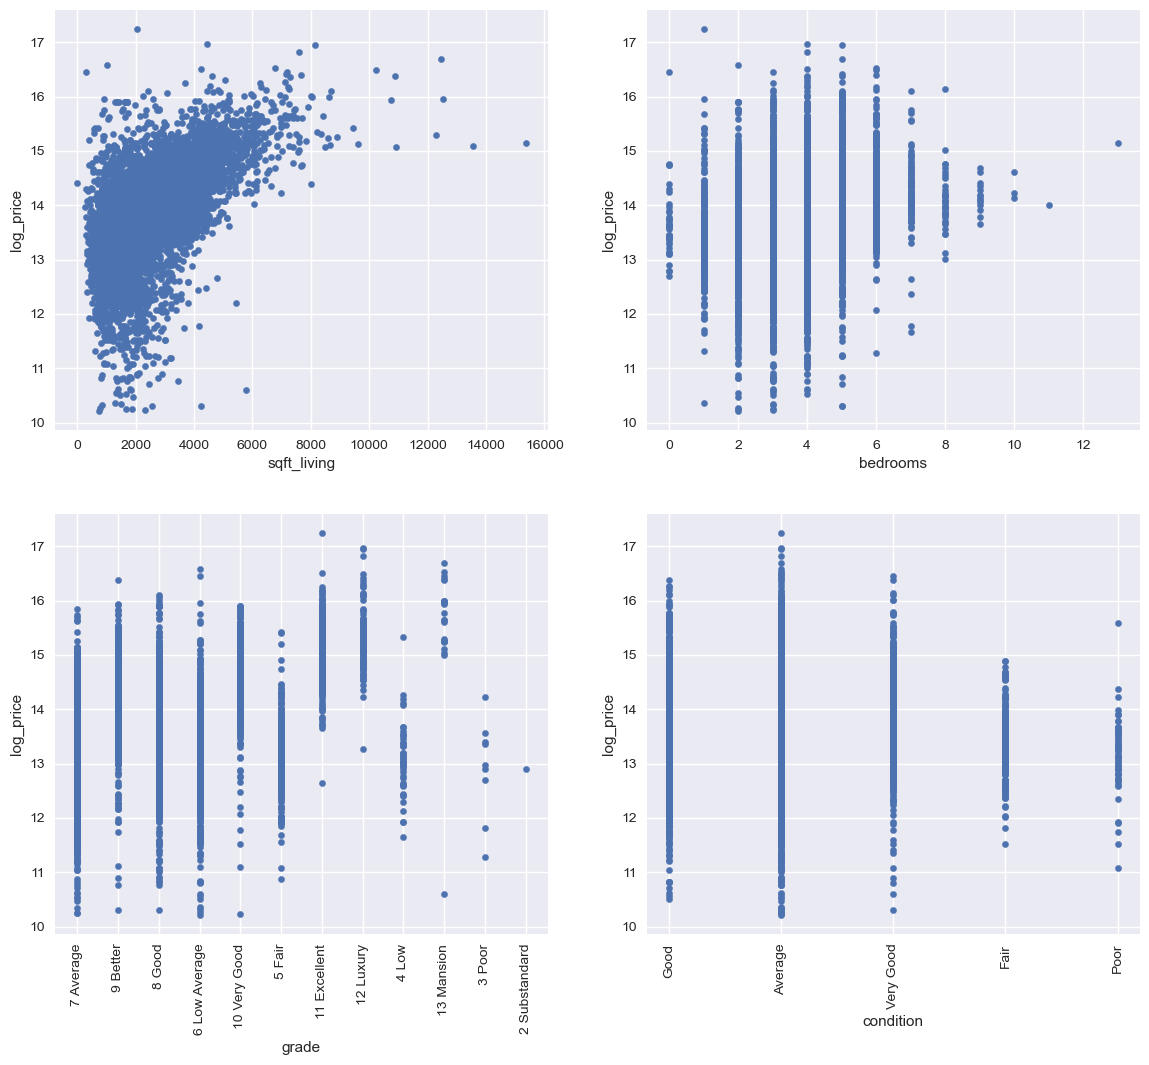

In [68]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,12))
df.plot.scatter(x="sqft_living", y="log_price", ax=axes[0][0])

df.plot.scatter(x="bedrooms", y="log_price", ax=axes[0][1])
df.plot.scatter(x="grade", y="log_price", ax=axes[1][0], rot=90)
df.plot.scatter(x="condition", y="log_price", ax=axes[1][1], rot=90);
#fig.tight_layout();               

## Tranform log target variable

In [ ]:
baseline_log_y_model = sm.OLS(y_log, sm.add_constant(X_baseline))
baseline_log_y_results = baseline_log_y_model.fit()

print(baseline_log_y_results.summary())

## Interpretation:
 38% of the variation in sale price is explained by the model. This is only slightly better than the previous model. Both the coeficient and intercept are significant. Each additioal Square foot of living room space adds ......$560 to the price.
 For each increase of  1
  unit in  𝑥
 , we see an associated change of  (𝛽∗100)%
  in  𝑦
  
  larger: For each increase of  1
  unit in  𝑥
 , we see an associated change of  ((𝑒𝛽−1)∗100)%
  in  𝑦


In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sm.graphics.qqplot(baseline_log_y_results.resid, dist=stats.norm, line='45', fit=True, ax=ax1)
ax2.hist(baseline_log_y_results.resid, bins="auto");
ax2.set_title("Distribution of Residuals");
ax1.set_title("Quantiles of Residuals");

## Log transform X

In [ ]:
X_log = np.log(df['sqft_living'])

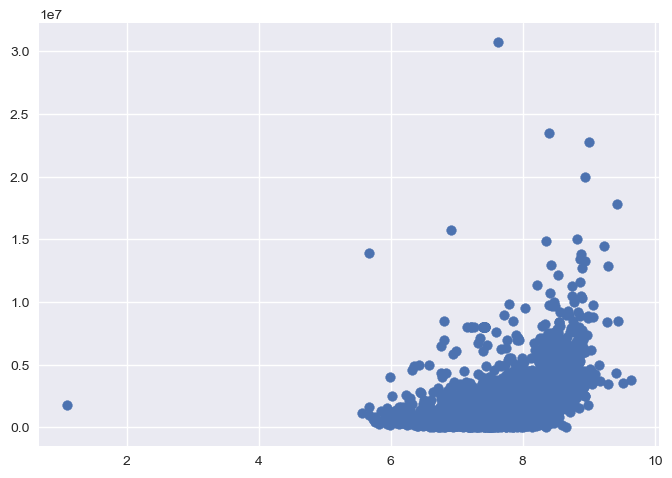

In [56]:
plt.scatter(x=X_log, y=df["price"])


In [57]:
baseline_log_x_model = sm.OLS(y, sm.add_constant(X_log))
baseline_logx_results = baseline_log_x_model.fit()

print(baseline_logx_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                 1.089e+04
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        13:17:16   Log-Likelihood:            -4.5079e+05
No. Observations:               30111   AIC:                         9.016e+05
Df Residuals:                   30109   BIC:                         9.016e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.781e+06   7.57e+04    -89.546      

In [ ]:
baseline_log_xy_model = sm.OLS(y_log, sm.add_constant(X_log))
baseline_logxy_results = baseline_log_xy_model.fit()

print(baseline_logxy_results.summary())

## Interpretation:
 35% of the variation in sale price is explained by the model. Both the coeficient and intercept are significant. Each additioal Square foot of living room space adds $560 to the price.
For each increase of  1%
  in  𝑥
 , we see an associated change of  𝛽%
  in  𝑦
 
For larger values of  𝛽
  and/or percentages larger than 1%, we can also use this formula:

For each increase of  𝑝%
  in  𝑥
 , we see an associated change of  ((𝑒𝛽∗𝑙𝑜𝑔((100+𝑝)/100)−1)∗100)%
  in  𝑦

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sm.graphics.qqplot(baseline_logxy_results.resid, dist=stats.norm, line='45', fit=True, ax=ax1)
ax2.hist(baseline_logxy_results.resid, bins="auto");
ax2.set_title("Distribution of Residuals");
ax1.set_title("Quantiles of Residuals");

The distribution of the residuals is worse...

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,18))
for i, col in enumerate(["condition", "bathrooms", "floors", "grade"]):
     df.groupby(col).mean().plot.bar(y="price", ax=axes[i-1][0])
     df[col].value_counts().plot.bar(ax=axes[i-1][1]).set_xlabel(col)
plt.tight_layout()

## Add grades

In [ ]:
df2 = df.copy()
df2 = pd.get_dummies(df2, columns=["grade"]) #, drop_first=True
df2.drop('grade_7 Average', axis=1, inplace=True)
df2.columns

In [ ]:
X0 = df2[['sqft_living', 'grade_1 Cabin',
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_8 Good',
       'grade_9 Better']]

In [ ]:
model0 = sm.OLS(y_log, sm.add_constant(X0))
model0_results = model0.fit()

print(model0_results.summary())

## Interpretation:
 45% of the variation in sale price is explained by the model. Both the coeficient and intercept are significant. Each additioal Square foot of living room space adds $560 to the price.


In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sm.graphics.qqplot(model0_results.resid, dist=stats.norm, line='45', fit=True, ax=ax1)
ax2.hist(model0_results.resid, bins="auto");
ax2.set_title("Distribution of Residuals");
ax1.set_title("Quantiles of Residuals");

## Add condition

In [ ]:
df1 = df.copy()

In [ ]:
df2 = pd.get_dummies(df2, columns=["condition"]) #, drop_first=True
df2.drop('condition_Average', axis=1, inplace=True)
df2.columns

https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g 

Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. 
Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [ ]:
X1 = df2[['sqft_living', 'grade_1 Cabin',
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_8 Good',
       'grade_9 Better', 'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'bathrooms']]

In [ ]:
model1 = sm.OLS(y_log, sm.add_constant(X1))
model1_results = model1.fit()

print(model1_results.summary())

## Interpretation:
 45.5% of the variation in sale price is explained by the model. This ism only slightly better than the model without condition. Both the coeficient and intercept are significant. Each additioal Square foot of living room space adds $560 to the price.


In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sm.graphics.qqplot(model1_results.resid, dist=stats.norm, line='45', fit=True, ax=ax1)
ax2.hist(model1_results.resid, bins="auto");
ax2.set_title("Distribution of Residuals");
ax1.set_title("Quantiles of Residuals");

## Add Patio sqft

In [ ]:
X3 = df2[['sqft_living', 'grade_1 Cabin',
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_8 Good',
       'grade_9 Better', 'sqft_patio']]

model3 = sm.OLS(y_log, sm.add_constant(X3))
model3_results = model3.fit()

print(model3_results.summary())


In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sm.graphics.qqplot(model3_results.resid, dist=stats.norm, line='45', fit=True, ax=ax1)
ax2.hist(model3_results.resid, bins="auto");
ax2.set_title("Distribution of Residuals");
ax1.set_title("Quantiles of Residuals");

## Add Floors

In [ ]:
X5 = df2[['sqft_living', 'grade_1 Cabin',
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_8 Good',
       'grade_9 Better', 'floors']]

model5 = sm.OLS(y_log, sm.add_constant(X5))
model5_results = model5.fit()

print(model5_results.summary())

## Interpretation:
 37% of the variation in sale price is explained by the model. Both the coeficient and intercept are significant. Each additioal Square foot of living room space adds $560 to the price.


In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sm.graphics.qqplot(model5_results.resid, dist=stats.norm, line='45', fit=True, ax=ax1)
ax2.hist(model5_results.resid, bins="auto");
ax2.set_title("Distribution of Residuals");
ax1.set_title("Quantiles of Residuals");

## Everything

In [ ]:
X7 = df2[['sqft_living', 'grade_1 Cabin',
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_8 Good',
       'grade_9 Better', 'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'bathrooms', 'floors', 'sqft_patio', 'bedrooms']]

model7 = sm.OLS(y_log, sm.add_constant(X7))
model7_results = model7.fit()

print(model7_results.summary())

## Interpretation:
 46% of the variation in sale price is explained by the model. Both the coeficient and intercept are significant. Each additioal Square foot of living room space adds $560 to the price.This is hardly any better than the model with just Squarefoot living room and grade, and this model includes highly correlated variables. 


In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sm.graphics.qqplot(model7_results.resid, dist=stats.norm, line='45', fit=True, ax=ax1)
ax2.hist(model7_results.resid, bins="auto");
ax2.set_title("Distribution of Residuals");
ax1.set_title("Quantiles of Residuals");

## Conclusions

Based on the results of the analysis, my recommendations are to:

Where possible, enlarge the living room. 

Use high quality materials in the remodel and make the house look as nice as possible.